# Assignment 4 - The Titanic

## Loading the training data frame to perform data exploration

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors



df = pd.read_csv('train.csv')
print("Genral Info in titanic train DF:")
print("Columns are -->\n",df.columns)
print("Shape is -->\n",df.shape)

Genral Info in titanic train DF:
Columns are -->
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Shape is -->
 (891, 12)


##### Exploring what we think usefull
- Sex
- Age 
- Pclass
- Survived
##### We want to see the impact on the age and sex of the passenger and if they came from high class or low class and want to see if it have an impact on thier survival hier impact on the fact 

In [397]:
print("total samples",df.shape[0:1])
#Checking missing values , checking on age
print("Age NaN samples are :",df[df.Age.isnull()].shape[0:1] )
# total of 177 smaples out of 891 dont have thier age!
#Checking missing values , checking on Sex
print("Sex NaN samples are : ",df[df.Sex.isnull()].shape[0:1]) # Gender is not missing
#Checking missing values , checking on class
print("Pclass  NaN samples are : ",df[df.Pclass.isnull()].shape[0:1]) # class is not missing


total samples (891,)
Age NaN samples are : (0,)
Sex NaN samples are :  (0,)
Pclass  NaN samples are :  (0,)


##### Lets Fill in the missing values for Age
###### We have 2 options
1. drop the missing smaples , we dont want to as we loose data from 177 samples.
2. Assuming normal distribution on the age we will set the age to be the mean.


In [396]:
avarageAge=df.Age.mean()
df.Age = df.Age.fillna(value=avarageAge)

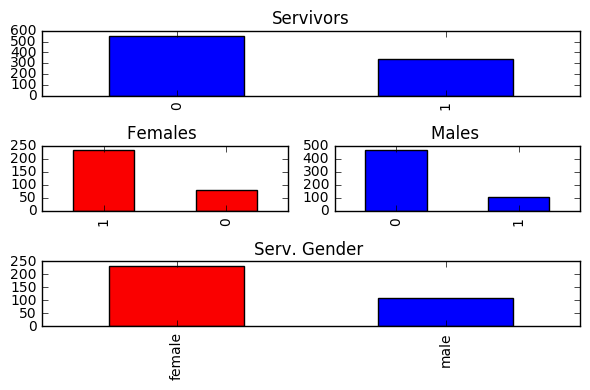

In [400]:
#using Subplots , to have plot with female and males with regads to whom survived

female_color="#FA0000"  #change it to red!
plt.subplot2grid((3,2),(0,0),colspan=2)
df.Survived.value_counts().plot(kind='bar',title='Servivors')
plt.subplot2grid((3,2),(1,0))
df[df.Sex=='female'].Survived.value_counts().plot(kind='bar',title='Females ',color=female_color)
plt.subplot2grid((3,2),(1,1))
df[df.Sex=='male'].Survived.value_counts().plot(kind='bar',title='Males ')
plt.subplot2grid((3,2),(2,0),colspan=2)
df[df.Survived==1].Sex.value_counts().plot(kind='bar',title='Serv. Gender ',color=[female_color,'b'])
plt.tight_layout()
plt.show()

#### from the above , we can see that if you were a female , you had a high chances to survive the titanic sinking :)
#### Lets Check Age feautre and its impact on survival

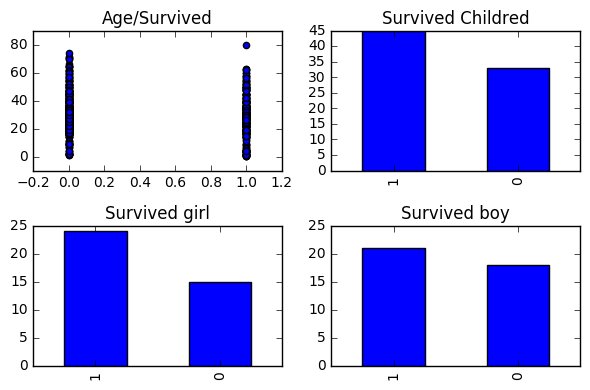

In [369]:
plt.subplot2grid((2,2),(0,0))
plt.scatter(df.Survived,df.Age)
plt.title("Age/Survived")


#Focusing on survived Children
#we will use the Age field and ask for a subset of out data set with Age less than certains age!
plt.subplot2grid((2,2),(0,1))
df[df.Age<15].Survived.value_counts().plot(kind='bar',title='Survived Childred')

# Children that seurvived with regards to gender
plt.subplot2grid((2,2),(1,0))
df[(df.Age<15)&(df.Sex=='female')].Survived.value_counts().plot(kind='bar',title='Survived girl')
plt.subplot2grid((2,2),(1,1))
df[(df.Age<15)&(df.Sex=='male')].Survived.value_counts().plot(kind='bar',title='Survived boy')

plt.tight_layout()
plt.show()

##### Analisys
Age/Survived plot show scattering of age from 0-80 it done tell us much!
Checking for survived with regardes to ageand sex , it look like you had a higher chance to survive if you are small girl on the sinking boat rather that a small boy!

### Focusing on the CLASS !
#### lets see the %on board and thier class distrubtion

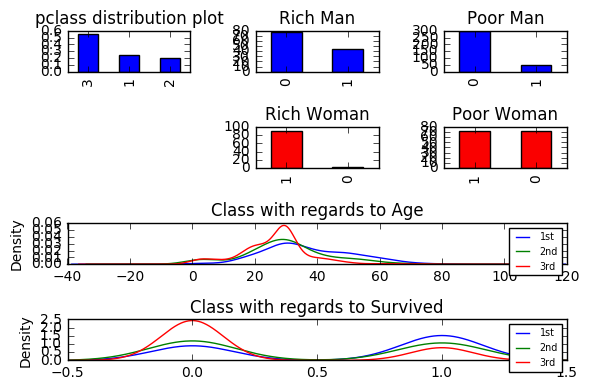

In [402]:
plt.subplot2grid((4,3),(0,0))
df.Pclass.value_counts(normalize=True).plot(kind='bar')
plt.title("pclass distribution plot")
plt.subplot2grid((4,3),(0,1),)
df.Survived[(df.Pclass == 1)&(df.Sex == 'male')].value_counts().plot(kind='bar')
plt.title("Rich Man")
plt.subplot2grid((4,3),(0,2))
df.Survived[(df.Pclass == 3)&(df.Sex == 'male')].value_counts().plot(kind='bar')
plt.title("Poor Man")

plt.subplot2grid((4,3),(1,1),)
df.Survived[(df.Pclass == 1)&(df.Sex == 'female')].value_counts().plot(kind='bar',color=female_color)
plt.title("Rich Woman")
plt.subplot2grid((4,3),(1,2))
df.Survived[(df.Pclass == 3)&(df.Sex == 'female')].value_counts().plot(kind='bar',color=female_color)
plt.title("Poor Woman")


plt.subplot2grid((4,3),(2,0),colspan=3)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind='kde')
plt.title("Class with regards to Age")
plt.legend(("1st","2nd","3rd"),fontsize="x-small")

plt.subplot2grid((4,3),(3,0),colspan=3)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind='kde')
plt.title("Class with regards to Survived")
plt.legend(("1st","2nd","3rd"),fontsize="x-small")

plt.tight_layout()
plt.show()

##### Analysis
Looking at the male and class distribution we see the Poor Men survived less!
for women , even a more hard picture , we see the rich women have much higher rate of survival!
As for Class with regards to Age and with regards to survivded  ,
we see the Ages of 1st class ppl that survived is high ( welthy old ppl survived!)


# Predictions
## First we try to predict based on the Sex.
#### if you are a female you live! otherwise you die!
#### We know its not accurate but lets check the scores using train.csv

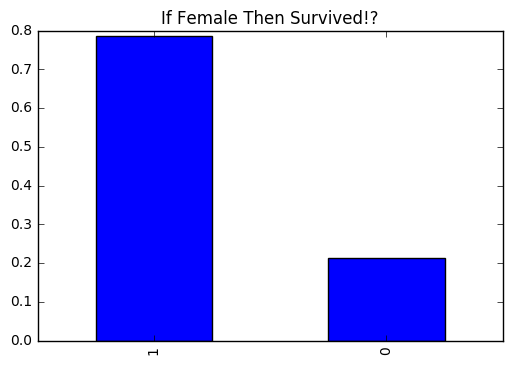

Our Model based on training Set and checking gender only can prediction based on the following precision: 1    0.786756
0    0.213244
Name: Result, dtype: float64


In [371]:
train = pd.read_csv('train.csv')
train['MyGuess']=0 ## I add a new col to the DF called MyGuess that will hold my answer. 
#i will set it to 1 if female
train.loc[train.Sex=='female','MyGuess']=1
#i will compare it to survived (actual colum)
train['Result']=0 ## I add a new col to to hold the resulrt compared to acutal result
train.loc[train.Survived==train['MyGuess'],'Result']=1
train["Result"].value_counts(normalize=True).plot(kind="bar")
plt.title("If Female Then Survived!?")
plt.show()


print ("Our Model based on training Set and checking gender only can prediction based on the following precision:",
       train["Result"].value_counts(normalize=True))



In [454]:
#Normalize the Data !! we  change the strings to integers!
train = pd.read_csv('train.csv')
train["Embarked"]=train["Embarked"].fillna("S")  # <-- Empty we fill it with "S" assuming boarded at "S"
train["Age"]=train["Age"].fillna(train["Age"].dropna().median())# for Age we set missing to the meadian!
# replace Sex with male 0 and female 1
train.loc[train["Sex"]=="male","Sex"]=0
train.loc[train["Sex"]=="female","Sex"]=1
#replace locations of embarked
train.loc[train["Embarked"]=="S","Embarked"]=0
train.loc[train["Embarked"]=="C","Embarked"]=1
train.loc[train["Embarked"]=="Q","Embarked"]=2

target=train["Survived"].values # Passing the target values for learning!
features=train[["Sex","Pclass","Age","Embarked","SibSp","Parch"]].values # We tell the Machine Algorithim that these are the hints

##### Analysis
we see that the results get better , the more that we add more informtion , basically we are telling the algorithin adidtional explanantions to work with that assist in fitting the correct line that most match the data 

#### SVM  ( Support Vector Classifier)

In [455]:
svm_classifier = svm.LinearSVC()
classif = svm_classifier.fit(features,target)
classif.score(features,target)


0.81144781144781142

#### Usin K Nearest Neighbors (KNN)

In [456]:
knn = neighbors.KNeighborsClassifier(3)
classif = knn.fit(features,target)
classif.score(features,target)

0.86868686868686873